In [353]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [365]:
saiko_pre = pd.read_csv("saiko.csv")
saiko = saiko_pre[0:35].copy()
chukan = pd.read_csv("chukan.csv")
saite = pd.read_csv("saite.csv")
saiko["周囲長(cm)"]=saiko["周囲長(cm)"]/100

<AxesSubplot:>

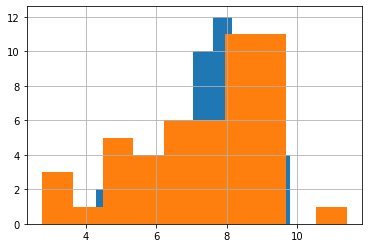

In [366]:
saite["高さ(m)"].hist()
chukan["高さ(m)"].hist()

In [367]:
st.mannwhitneyu(chukan["高さ(m)"],saite["高さ(m)"])

MannwhitneyuResult(statistic=1215.0, pvalue=0.8225652949883435)

In [368]:
saite["sp"]=saite["種類"].map(is_shinyoju)

In [369]:
def is_shinyoju(sp):
    if sp == "オオシラビソ":
        return True
    elif sp == "シラビソ":
        return True
    elif sp == "ナナカマド":
        return False
    elif sp == "ダケカンバ":
        return False

In [370]:
def taiseki(data): #m3
    shuicho = data["周囲長(cm)"] #本当はm
    takasa = data["高さ(m)"]
    hankei = shuicho/(2*np.pi)
    temenseki = hankei**2 * np.pi
    taiseki = temenseki * takasa /3
    return taiseki
def biomass(data):
    if data["sp"][0]:
        ans = 0.4 * data["体積"] * 10**6 / 1000
    else:
        ans = 0.6 * data["体積"] * 10**6 / 1000
    return ans
def junichiziseisan(data):
    return data["バイオマス"].sum()*490/30/60*1000

In [371]:
saite["体積"]=taiseki(saite)
saite["バイオマス"]=biomass(saite)

In [372]:
junichiziseisan(saite)

148190.85840916802

In [373]:
print(junichiziseisan(saite) / 1000 /100 /365 /15 *100, "%")

0.02706682345372932 %


In [374]:
saiko["sp"]=saiko["種類"].map(is_shinyoju)
saiko["体積"]=taiseki(saiko)
saiko["バイオマス"]=biomass(saiko)
print(junichiziseisan(saiko) / 1000 /100 /365 /15 *100, "%")

0.003476772689862321 %


In [375]:
chukan["sp"]=chukan["種類"].map(is_shinyoju)
chukan["体積"]=taiseki(chukan)
chukan["バイオマス"]=biomass(chukan)
print(junichiziseisan(chukan) / 1000 /100 /365 /15 *100, "%")

0.03341720439856584 %


In [377]:
file = saiko
area = 18.42

saiko_dence = len(file)/area #個体数/m2
saiko_taiju = file["バイオマス"].mean()

In [378]:
file = chukan
area = 100

chukan_dence = len(file)/area #個体数/m2
chukan_taiju = file["バイオマス"].mean()

In [379]:
file = saite
area = 100

saite_dence = len(file)/area #個体数/m2
saite_taiju = file["バイオマス"].mean()

array([ 1.55632356, -1.3548632 ])

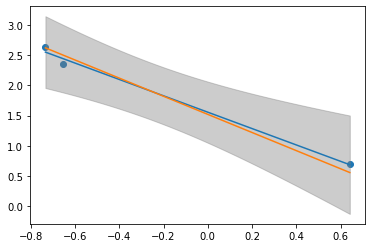

In [380]:
dence = [saiko_dence, chukan_dence, saite_dence]
taiju = [saiko_taiju, chukan_taiju, saite_taiju]
log_dence = np.log(dence)
log_taiju = np.log(taiju)

x = log_dence
y = log_taiju
n = 3

plt.scatter(x,y)
X = sm.add_constant(x)
model = sm.OLS(y, X)
fitted = model.fit()
x_pred = np.linspace(x.min(),x.max(),50)
X_pred = sm.add_constant(x_pred)
y_pred = fitted.predict(X_pred)
plt.plot(x_pred,y_pred)
y_hat = fitted.predict(X)
y_err = y - y_hat
mean_x = np.mean(x)
dof = n - fitted.df_model -1
alpha = 0.05
t = st.t.ppf(1-alpha, df=dof)
s_err = np.sum(y_err**2)
std_err = np.sqrt(s_err/(n-2))
std_x = np.std(x)
conf = t*std_err/np.sqrt(n)*np.sqrt(1+((x_pred-mean_x)/std_x)**2)
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
plt.fill_between(x_pred,lower,upper,color='gray',alpha=0.4)

y_theory = -1.5 * (x_pred - mean_x) + np.mean(log_taiju)
plt.plot(x_pred,y_theory)
fitted.params

const      0.660991
周囲長(cm)    0.767031
dtype: float64

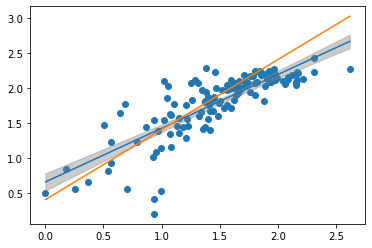

In [387]:
all_data = pd.concat([saiko,chukan,saite])
x = np.log(all_data["周囲長(cm)"]/(2*np.pi)*100)
y = np.log(all_data["高さ(m)"])
n = len(all_data)

plt.scatter(x,y)
X = sm.add_constant(x)
model = sm.OLS(y, X)
fitted = model.fit()
x_pred = np.linspace(x.min(),x.max(),50)
X_pred = sm.add_constant(x_pred)
y_pred = fitted.predict(X_pred)
plt.plot(x_pred,y_pred)
y_hat = fitted.predict(X)
y_err = y - y_hat
mean_x = np.mean(x)
dof = n - fitted.df_model -1
alpha = 0.05
t = st.t.ppf(1-alpha, df=dof)
s_err = np.sum(y_err**2)
std_err = np.sqrt(s_err/(n-2))
std_x = np.std(x)
conf = t*std_err/np.sqrt(n)*np.sqrt(1+((x_pred-mean_x)/std_x)**2)
upper = y_pred + abs(conf)
lower = y_pred - abs(conf)
plt.fill_between(x_pred,lower,upper,color='gray',alpha=0.4)

y_theory = 1 * (x_pred - mean_x) + np.mean(log_taiju)
plt.plot(x_pred,y_theory)
fitted.params

In [383]:
fitted.params

const      0.660991
周囲長(cm)    0.767031
dtype: float64

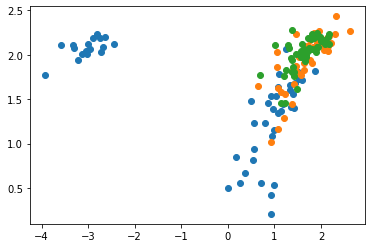

In [345]:
plt.scatter(np.log(saiko["周囲長(cm)"]/(2*np.pi)*100),np.log(saiko["高さ(m)"]))
plt.scatter(np.log(chukan["周囲長(cm)"]/(2*np.pi)*100),np.log(chukan["高さ(m)"]))
plt.scatter(np.log(saite["周囲長(cm)"]/(2*np.pi)*100),np.log(saite["高さ(m)"]))

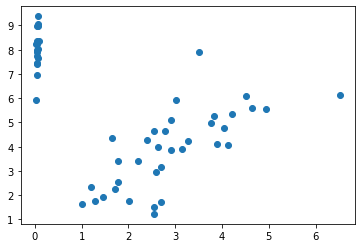

In [343]:
plt.scatter(saiko["周囲長(cm)"]/(2*np.pi)*100,saiko["高さ(m)"])


In [344]:
saiko

,No.,X(m),Y(m),高さ(m),周囲長(cm),種類,sp,体積,バイオマス
0,D877,0.00,0.00,3.41,0.13800,オオシラビソ,True,1.722588e-03,0.689035
1,D878,0.28,0.15,1.75,0.12700,オオシラビソ,True,7.487113e-04,0.299485
2,D879,0.50,0.24,6.13,0.41000,オオシラビソ,True,2.733361e-02,10.933446
3,D880,0.65,0.24,1.65,0.06300,オオシラビソ,True,1.737136e-04,0.069485
4,D881,0.57,1.22,3.85,0.18300,オオシラビソ,True,3.420045e-03,1.368018
5,D882,1.52,1.50,2.96,0.16300,オオシラビソ,True,2.086103e-03,0.834441
6,D883,0.98,1.80,2.33,0.07500,オオシラビソ,True,3.476541e-04,0.139062
7,D884,0.46,1.72,2.56,0.11100,オオシラビソ,True,8.366712e-04,0.334668
8,D885,0.36,1.97,5.60,0.29200,オオシラビソ,True,1.266551e-02,5.066203
9,D886,0.42,2.45,4.66,0.17500,オオシラビソ,True,3.785567e-03,1.514227
